In [4]:
import pandas as pd
import numpy as np

data = pd.read_excel('training.xlsx')
class_1_data = data[data['output'] == 0].iloc[:, :-1]
class_2_data = data[data['output'] == 1].iloc[:, :-1]
centroid_class_1 = class_1_data.mean(axis=0)
centroid_class_2 = class_2_data.mean(axis=0)
spread_class_1 = class_1_data.std(axis=0)
spread_class_2 = class_2_data.std(axis=0)
interclass_distance = np.linalg.norm(centroid_class_1 - centroid_class_2)

print("Class 1 Centroid:")
print(centroid_class_1.mean())
print("\nClass 1 Spread:")
print(spread_class_1)   
print("\nClass 2 Centroid:")
print(centroid_class_2.mean())
print("\nClass 2 Spread:")
print(spread_class_2)
print("\nInterclass Distance:", interclass_distance)


Class 1 Centroid:
-0.003104238028519999

Class 1 Spread:
embed_0      0.294157
embed_1      0.089135
embed_2      0.119411
embed_3      0.116298
embed_4      0.148771
               ...   
embed_379    0.179513
embed_380    0.249280
embed_381    0.095489
embed_382    0.233278
embed_383    0.161591
Length: 384, dtype: float64

Class 2 Centroid:
-0.0025223632477315177

Class 2 Spread:
embed_0      0.205344
embed_1      0.169176
embed_2      0.190184
embed_3      0.165142
embed_4      0.180539
               ...   
embed_379    0.209587
embed_380    0.240728
embed_381    0.137176
embed_382    0.172404
embed_383    0.216872
Length: 384, dtype: float64

Interclass Distance: 1.3445466151063252


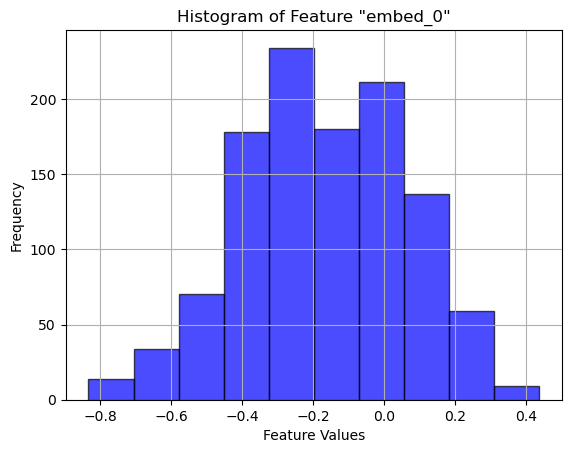

Mean: -0.17029445322602035
Variance: 0.05343827792925803


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('training.xlsx')
feature_data = data['embed_0']
hist, bins = np.histogram(feature_data, bins=10)  # You can adjust the number of bins as needed

plt.hist(feature_data, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature "embed_0"')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
mean = np.mean(feature_data)
variance = np.var(feature_data)

print("Mean:", mean)
print("Variance:", variance)


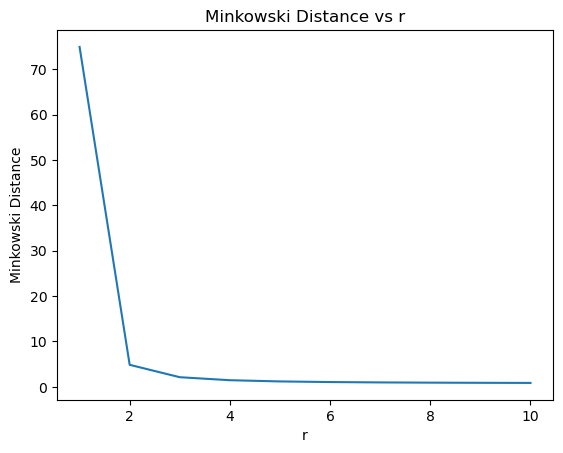

In [6]:
from scipy.spatial.distance import minkowski

feature_vector1 = data.iloc[0, :]  # Example feature vector 1
feature_vector2 = data.iloc[1, :]  # Example feature vector 2

r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(feature_vector1, feature_vector2, r)
    distances.append(distance)

plt.plot(r_values, distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['output'])  
y = data['output']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [8]:
import pandas as pd

data = pd.read_excel('training.xlsx')
def convert_to_binary_class(value):
    if value < 1:
        return 0
    elif value > 4:
        return 0
    else:
        return 1
data['output'] = data['output'].apply(convert_to_binary_class)
data.to_excel('modified_dataset.xlsx', index=False)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data = pd.read_excel('modified_dataset.xlsx')
X = data.drop('output', axis=1)
y = data['output']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7699115044247787


In [9]:
accuracy_values = []
k_values = range(1, 383)  
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

KeyboardInterrupt: 

In [ ]:
predictions = neigh.predict(X_test)
print("Predictions:", predictions)


Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 25,  26],
       [ 26, 149]], dtype=int64)

In [ ]:
precision = 149 / (149 + 26)
recall = 149 / (149 + 26)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8514285714285714
Recall: 0.8514285714285714
F1-score: 0.8514285714285714


**LAB-5

Confusion Matrix (Test Data):
 [[ 25  26]
 [ 26 149]]
Precision (Test Data): 0.8514285714285714
Recall (Test Data): 0.8514285714285714
F1-Score (Test Data): 0.8514285714285714


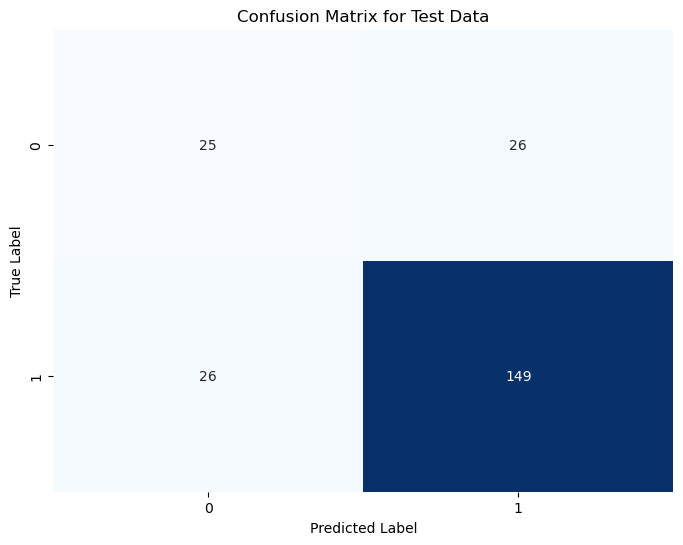

In [ ]:
import seaborn as sns
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

# Precision, Recall, and F1-Score for Test Data
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print("Precision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_test)

# Display Confusion Matrix with Heatmap for Test Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()

Confusion Matrix (Training Data):
 [[137 118]
 [ 49 596]]
Precision (Training Data): 0.834733893557423
Recall (Training Data): 0.924031007751938
F1-Score (Training Data): 0.8771155261221486


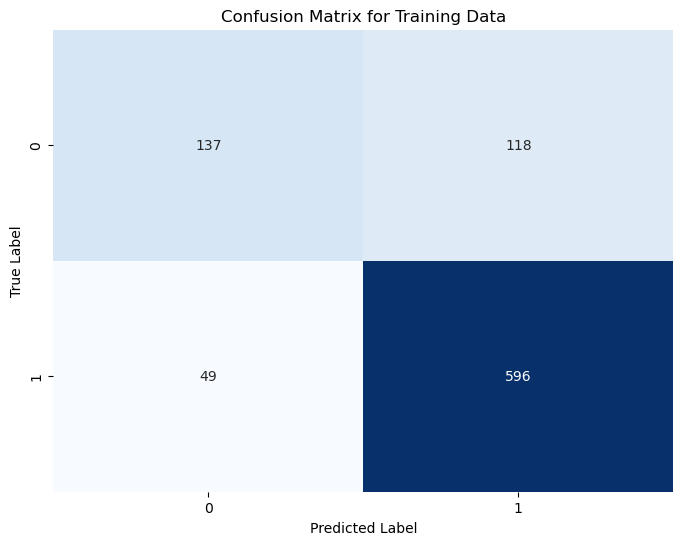

In [ ]:
# Predictions on Training Data
y_train_pred = knn.predict(X_train)

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):\n", conf_matrix_train)

# Precision, Recall, and F1-Score for Training Data
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Precision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_train)

# Display Confusion Matrix with Heatmap for Training Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Training Data')
plt.show()

In [12]:
x_values=X_train
y_values=y_train
xx, yy = np.meshgrid(x_values, y_values)
grid = np.c_[xx.ravel(), yy.ravel()]

KeyboardInterrupt: 